## Introduction

Nama    : Fadhil Reza Maulana

Batch   : 007

## Description

The Dataset is about Telco Customer Churn. 

Here are some information of the columns in this dataset:

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

## Objective

Objective from this dataset that we can make a model using Artificial Neural Networks Model that can predict behavior to retain customers. Are they possible to churn or not.

## Import Libraries

In [203]:
# Load Library yang dibutuhkan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from category_encoders.one_hot import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow import keras

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


## Load Dataset

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Exploratory Data Analysis (EDA)

### First Look The Data

Show dataset

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Show shape of the dataset**

In [4]:
df.shape

(7043, 21)

**Show the summary of the dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
print('Columns with object data type: {}'.format(len(df.select_dtypes(include = 'object').columns)))
print('Columns with numeric data type: {}'.format(len(df.select_dtypes(exclude = 'object').columns)))

Columns with object data type: 18
Columns with numeric data type: 3


* From the summary we can see that the dataset have 21 columns with 7043 rows
* 18 columns with object data type and 3 columns with numeric data type
* There's no missing value (*until now before further check*) 

**Show all unique value from each columns**

In [7]:
print('Unique Value each Columns \n')
for col in df:
  print('{} : {}'.format(col, df[col].unique()))

Unique Value each Columns 

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic ch

We can see that TotalCharges column have numeric values, but the data type is an object. So we should convert the datatype to float

**Convert column 'TotalCharges' dtype to numeric**

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

Because I'm using coerce as an error parameter, there will be Missing Values

**Check missing value on TotalCharges column**

In [9]:
df['TotalCharges'].isnull().sum()

11

We can see that there are 11 NaN value on TotalCharges. Because the number of missing value so small, so i decide to handle it in this step, not in Preprocessing by droping the NaN

In [10]:
df.dropna(inplace = True)
df['TotalCharges'].isnull().sum()

0

Now the column is free of NaN

### Data Visualization

**Plot The Correlation between features and Churn (Target Column)**

In [11]:
corr = df.copy()
corr.drop(['customerID'], axis = 1, inplace=True)

In [12]:
corr['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
corr['Churn'].replace(to_replace = 'No', value = 0, inplace = True)

In [13]:
corr_dummies = pd.get_dummies(corr)

In [14]:
corr_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


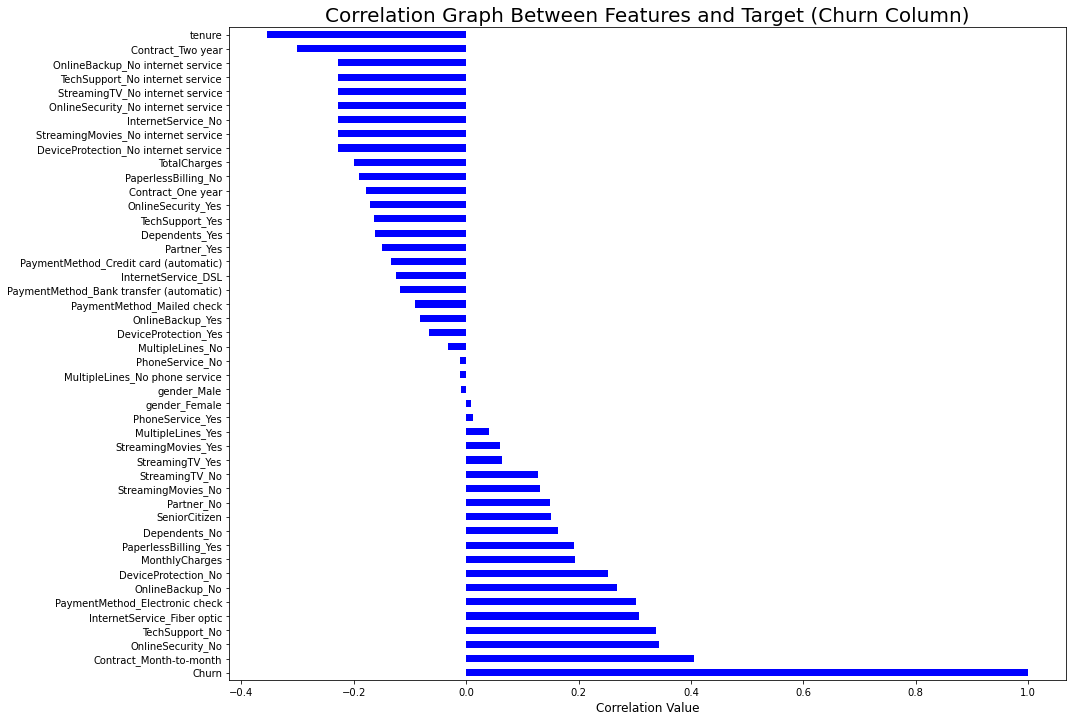

In [15]:
plt.figure(figsize = (15,12))
corr_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='barh', color='blue')
plt.title('Correlation Graph Between Features and Target (Churn Column)', fontsize = 20)
plt.xlabel('Correlation Value', fontsize = 12)
plt.show()

The information that I get from the graph above are:
* Features such as gender, Phone Service and Multiple Lines almost got zero correlation with Churn. 
* Customer who was not used any services that the provider gave such as Online Security, Tech Support, Online Backup and Device Protection is tend to have high correlation (in positive) with Churn
* Also monthly customer who used a contract month to month have a high correlation
* Feautures with high correlation (in negative value) some of them are tenure, contract two year, services (Online Backup, Tech Support, Streaming TV and Online Security) With No Internet Service 

**Plot The Distribution of Churn Column (Target)**

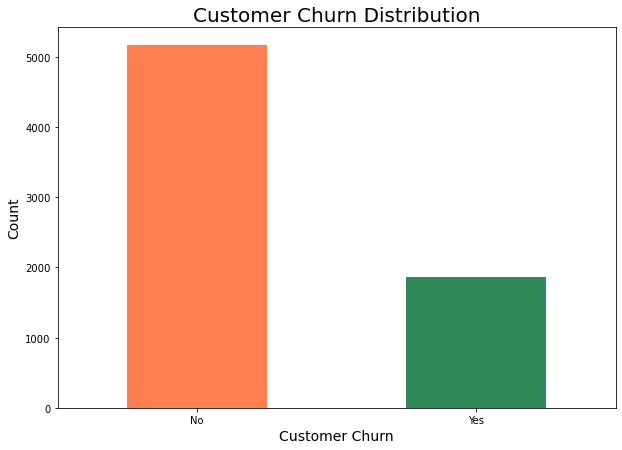

In [16]:
df['Churn'].value_counts().plot(kind='bar', figsize = (10,7), color = ['coral','seagreen'])
plt.title('Customer Churn Distribution', fontsize =20)
plt.xlabel('Customer Churn', fontsize = 14)
plt.xticks(rotation = 0)
plt.ylabel('Count', fontsize = 14)
plt.show()

We can see from the graph that most of customers is not churn their provider. To explain this we need to explore more how was the features affecting this churn distribution

**Plot and Explain The Relationship Between Services That Provider Offer with Customer Churn Rate**

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


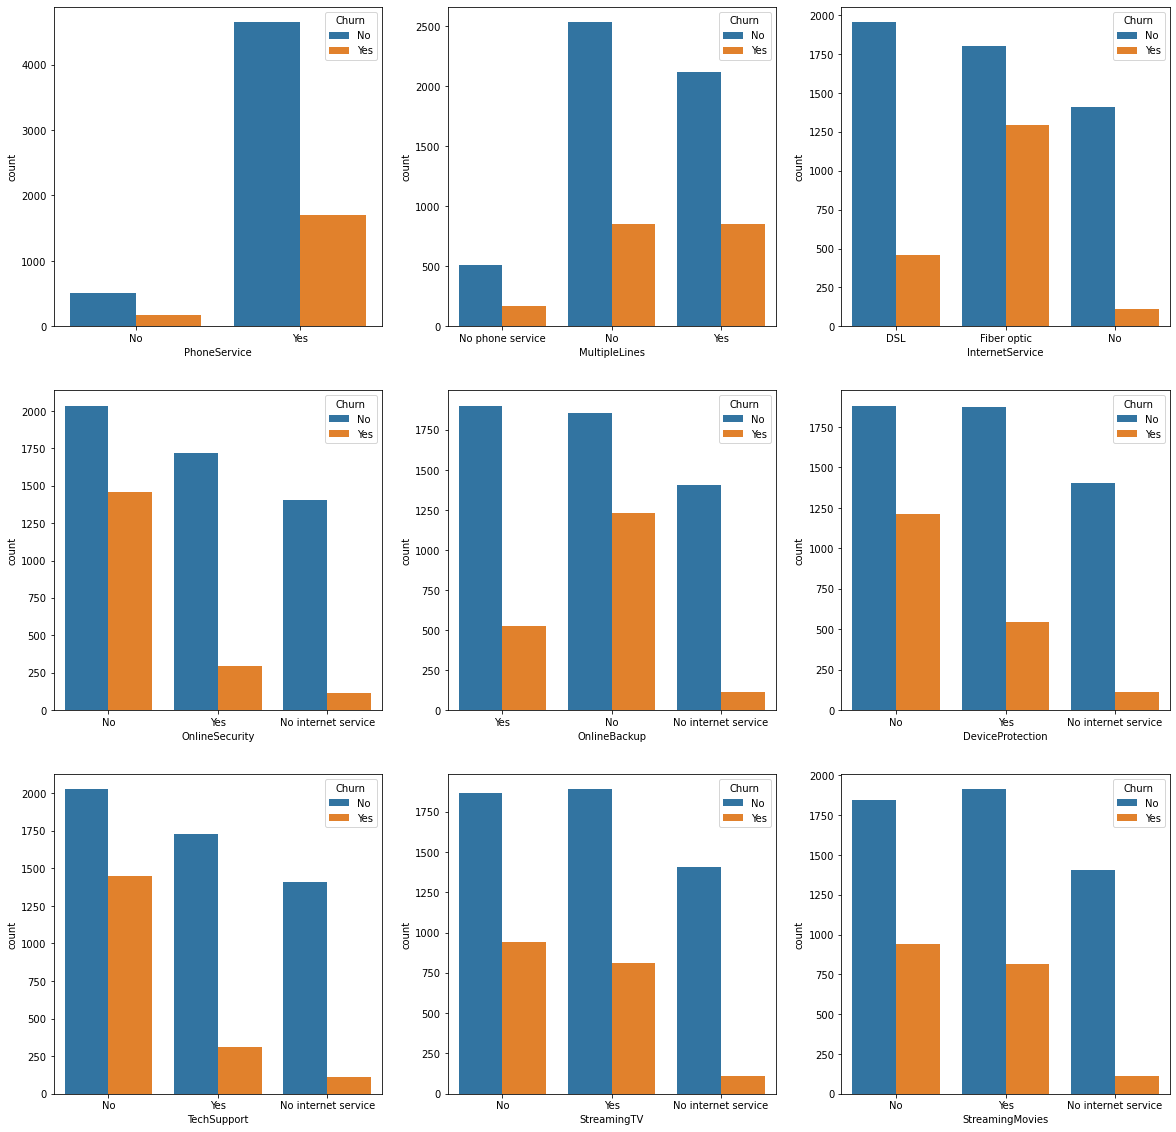

In [18]:
fig,ax = plt.subplots(3,3, figsize =(20,20))
sns.countplot(data = df, x = 'PhoneService', hue = 'Churn', ax=ax[0,0])
sns.countplot(data = df, x = 'MultipleLines', hue = 'Churn', ax=ax[0,1])
sns.countplot(data = df, x = 'InternetService', hue = 'Churn', ax=ax[0,2])

sns.countplot(data = df, x = 'OnlineSecurity', hue = 'Churn', ax=ax[1,0])
sns.countplot(data = df, x = 'OnlineBackup', hue = 'Churn', ax=ax[1,1])
sns.countplot(data = df, x = 'DeviceProtection', hue = 'Churn', ax=ax[1,2])

sns.countplot(data = df, x = 'TechSupport', hue = 'Churn', ax=ax[2,0])
sns.countplot(data = df, x = 'StreamingTV', hue = 'Churn', ax=ax[2,1])
sns.countplot(data = df, x = 'StreamingMovies', hue = 'Churn', ax=ax[2,2])

plt.show()

From this services graph, We can see that customers who did not use any services that provider offer, most likely churn or stop using this provider. Why ? 

                                                                        LET'S DIG DOWN DEEPER


**Plot Another Factor That make Customer Churn**

**1. Monthly and Total Charges correlation with Customer Churn**

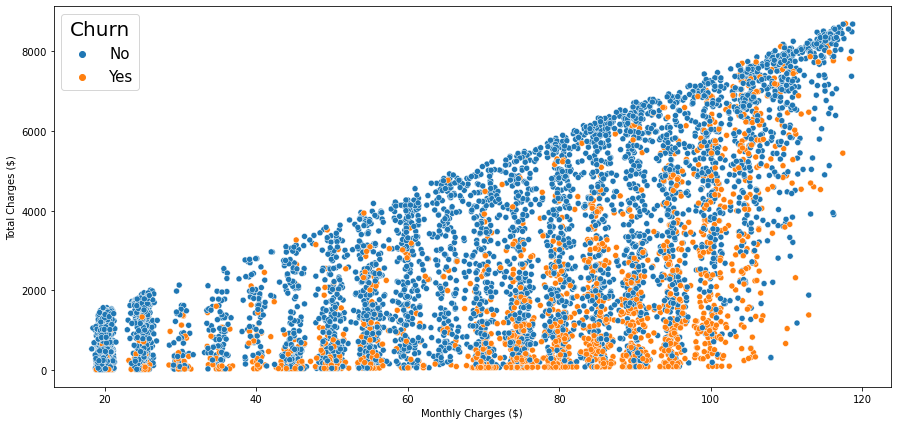

In [19]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Churn')
plt.legend(title = 'Churn', title_fontsize =20, fontsize = 15)
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Total Charges ($)')
plt.show()

After wathcing this graph, one of the factor that made customer churn was the Monthly Charges. The higher Monthly Charges, is directly proportional with possibility of them to leave or stop using this provider

**2. Tenure Correlation with Customer Churn**

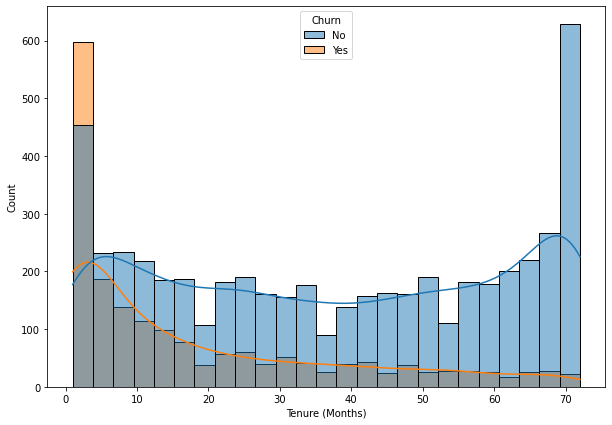

In [20]:
plt.figure(figsize=(10,7))
sns.histplot(data = df, x = 'tenure', kde = True, hue = 'Churn', bins = 25)
plt.xlabel('Tenure (Months)')
plt.show()

From this we can conclude that customer with tenure around lower than 5 months is more likely to churn

**3. Tenure and Monthly Charges Correlation with Customer Churn**

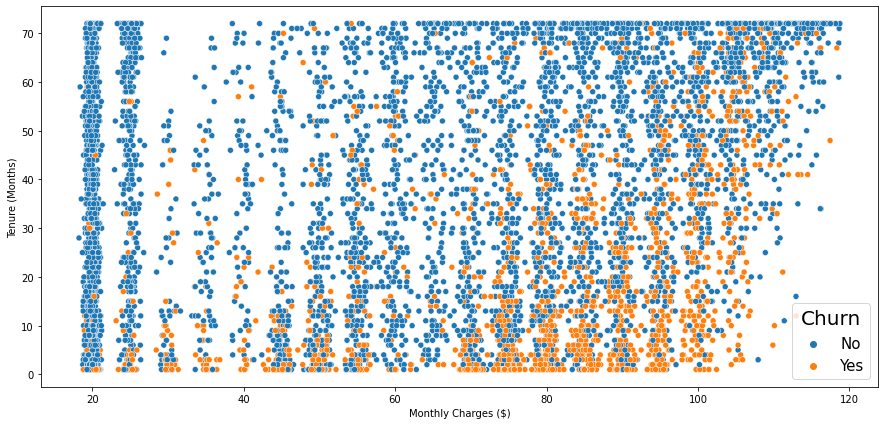

In [21]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'tenure', hue = 'Churn')
plt.legend(title = 'Churn', title_fontsize =20, fontsize = 15)
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Tenure (Months)')
plt.show()

And finally from this final EDA, I can conclude that a new customer who took monthly subscription package with charge over than 70 Dollars, is more likely to churn than other customers. Maybe the reason is their expectation was not fulfilled by the services that the provider gave.

## Preprocessing

### Split Data

**Split by features and target**

In [22]:
X = df.drop(['customerID','Churn'], axis = 1)
y = df['Churn']
df.shape, X.shape, y.shape

((7032, 21), (7032, 19), (7032,))

**Split by train, val and test**

In [23]:
Xtval, X_test, ytval, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
Xtval.shape, X_test.shape , ytval.shape, y_test.shape

((5625, 19), (1407, 19), (5625,), (1407,))

In [24]:
X_train, X_val, y_train, y_val = train_test_split(Xtval , ytval, test_size = 0.2, stratify = ytval)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4500, 19), (1125, 19), (4500,), (1125,))

### Handling Outliers

**Numerical Data distribution check**

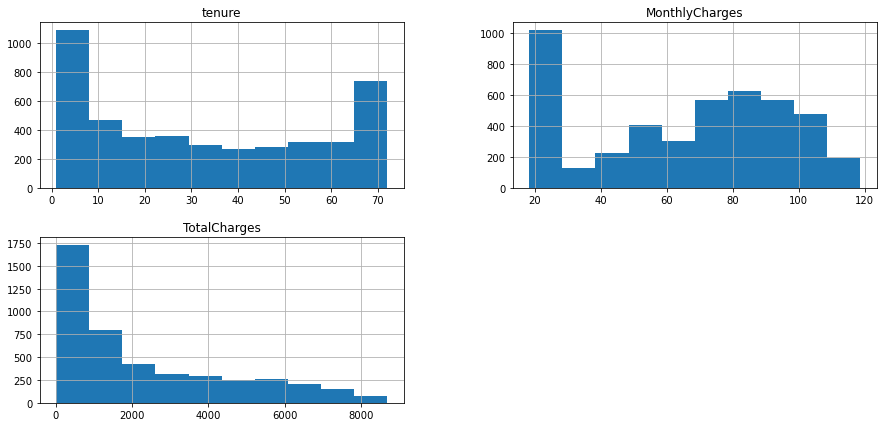

In [25]:
X_train.hist(column = ['tenure', 'MonthlyCharges', 'TotalCharges'], figsize = (15,7))
plt.show()

From the graph we can see that the data distribution is not normal (skewed)

In [26]:
X_train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,4500.000000,4500.000000,4500.000000,4500.000000
mean,0.157778,32.681111,64.929933,2294.589089
std,0.364573,24.657716,30.009484,2272.827437
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.737500,415.325000
50%,0.000000,29.000000,70.400000,1414.725000
75%,0.000000,56.000000,89.850000,3828.362500
max,1.000000,72.000000,118.650000,8684.800000


From X_train describe, I set that if a column max value is three times bigger than the median (50 %) value, that column has outliers. But as we can see there's no max value from each column that three times bigger than the median value. To prove that, let's plot this into boxplot

<AxesSubplot:>

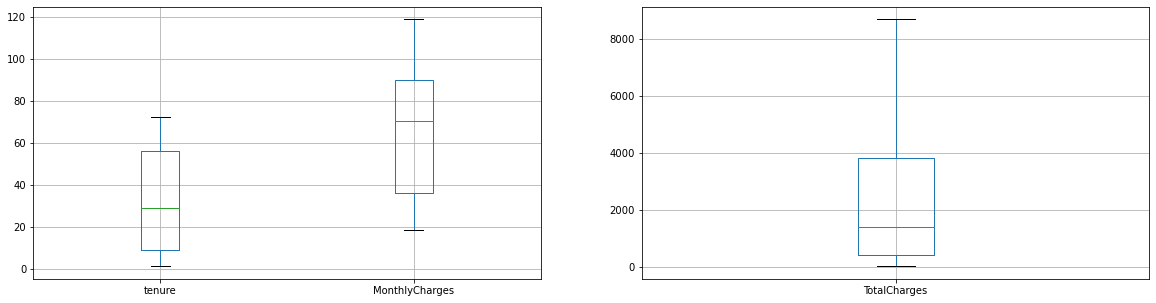

In [27]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
X_train.boxplot(column = ['tenure', 'MonthlyCharges'], ax = ax[0])
X_train.boxplot(column = ['TotalCharges'], ax = ax[1])

From the boxplot we also can see that the data distribution is not normal, and no outliers detected

### Handling Missing Value

Like I have said before, I have handle this in the EDA, because the missing value is so small, so i decide to drop it. Just to make sure let's check the missing value from each X_train, X_test and X_val

In [28]:
X_train.isnull().sum().sum(), X_test.isnull().sum().sum(), X_val.isnull().sum().sum()

(0, 0, 0)

Code above prove that this dataset already clear from missing value

### Group the Data By Numerical and Categorical Type

**Convert Senior Citizen to string data type**

In [29]:
X_train['SeniorCitizen']=X_train['SeniorCitizen'].astype(str)
X_val['SeniorCitizen']=X_val['SeniorCitizen'].astype(str)
X_test['SeniorCitizen']=X_test['SeniorCitizen'].astype(str)

**Define the features that contain numerical and categorical value**

In [30]:
num_cols = ['tenure','MonthlyCharges','TotalCharges']
cat_cols_ohe = ['PaymentMethod', 'Contract', 'InternetService']
cat_cols_le = (set(X_train.columns) - set(num_cols) - set(cat_cols_ohe))

### Scaling for Numerical Features

In [31]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [32]:
X_train.shape, X_val.shape, X_test.shape

((4500, 19), (1125, 19), (1407, 19))

### Encoding for Categorical Features

**Label Encoder for some categorical features**

In [33]:
le = LabelEncoder()
for col in cat_cols_le:
    le.fit(X_train[col])
    X_train[col] = le.transform(X_train[col])
    X_val[col] = le.transform(X_val[col])
    X_test[col] = le.transform(X_test[col])

**One Hot Encoder for some categorical features**

In [34]:
ohe = OneHotEncoder(cols = cat_cols_ohe, use_cat_names = True)
ohe.fit(X_train[cat_cols_ohe])
train_cols = ohe.transform(X_train[cat_cols_ohe])
val_cols = ohe.transform(X_val[cat_cols_ohe])
test_cols = ohe.transform(X_test[cat_cols_ohe])

In [35]:
X_train.drop(columns = cat_cols_ohe, inplace = True)
X_val.drop(columns = cat_cols_ohe, inplace = True)
X_test.drop(columns = cat_cols_ohe, inplace = True)

In [36]:
X_train_encode = pd.concat([X_train,train_cols], axis = 1)
X_val_encode = pd.concat([X_val,val_cols], axis = 1)
X_test_encode = pd.concat([X_test,test_cols], axis = 1)

In [37]:
X_train_encode.shape, X_val_encode.shape,X_test_encode.shape,

((4500, 26), (1125, 26), (1407, 26))

**Using Binary Encoder for the target on train, val and test**

In [39]:
y_train.value_counts()

No     3304
Yes    1196
Name: Churn, dtype: int64

In [214]:
y_train_encode = y_train.replace({'No':0, 'Yes':1})
y_val_encode = y_val.replace({'No':0, 'Yes':1})
y_test_encode = y_test.replace({'No':0, 'Yes':1})

### Feature Selection

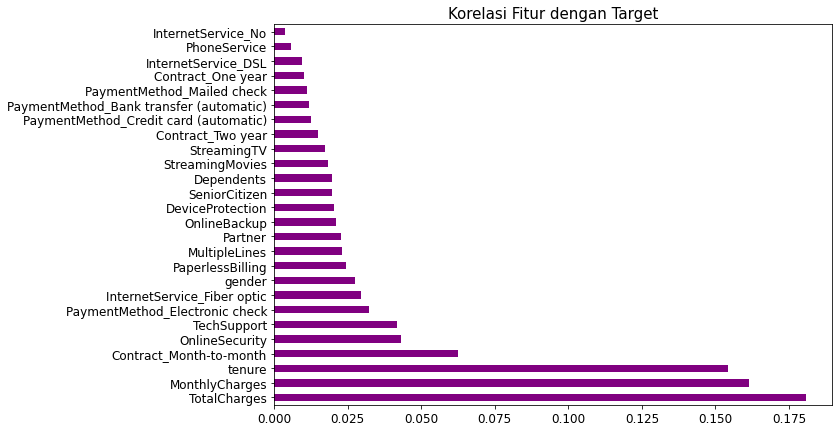

TotalCharges                               0.180597
MonthlyCharges                             0.161420
tenure                                     0.154182
Contract_Month-to-month                    0.062497
OnlineSecurity                             0.043127
TechSupport                                0.041831
PaymentMethod_Electronic check             0.032277
InternetService_Fiber optic                0.029616
gender                                     0.027648
PaperlessBilling                           0.024428
MultipleLines                              0.022932
Partner                                    0.022780
OnlineBackup                               0.021146
DeviceProtection                           0.020510
SeniorCitizen                              0.019842
Dependents                                 0.019569
StreamingMovies                            0.018302
StreamingTV                                0.017392
Contract_Two year                          0.015078
PaymentMetho

In [41]:
select_forest = RandomForestClassifier()
select_forest.fit(X_train_encode,y_train_encode)
feature_score = pd.Series(select_forest.feature_importances_, index=X_train_encode.columns).sort_values(ascending=False)

feature_score.plot(kind = 'barh', color = 'purple', figsize = (10,7), fontsize = 12)
plt.title(label = 'Korelasi Fitur dengan Target', fontsize = 15)
plt.show()
print(feature_score)

For feature selection I'm using Random Forest Classifier to show the feature score against the target. In here I set for the features that has score lower than 0.02, I will drop it (Exclude the features that have been encode using One Hot Encoder). And for features are:
1. PhoneService
2. StreamingTV
3. StreamingMovies
4. Dependents

**Data shape before drop some features**

In [42]:
X_train_encode.shape, X_val_encode.shape, X_test_encode.shape

((4500, 26), (1125, 26), (1407, 26))

In [43]:
X_train_encode.drop(['PhoneService','StreamingTV','StreamingMovies','Dependents'], axis = 1, inplace = True)
X_val_encode.drop(['PhoneService','StreamingTV','StreamingMovies','Dependents'], axis = 1, inplace = True)
X_test_encode.drop(['PhoneService','StreamingTV','StreamingMovies','Dependents'], axis = 1, inplace = True)

**Data shape after drop some features**

In [44]:
X_train_encode.shape, X_val_encode.shape, X_test_encode.shape

((4500, 22), (1125, 22), (1407, 22))

From the shape we can see that now the data after feature selection reduced to 15 features 

### Handling Imbalance Target Data Value

**as I know from the EDA that the target is imbalance, and we can see that from below**

In [45]:
y_train_encode.value_counts()

0    3304
1    1196
Name: Churn, dtype: int64

We can see that the No value is almost 3 times bigger than Yes value. To solve this problem i will use SMOTE to balanced the data.

In [46]:
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample (X_train_encode, y_train_encode)
y_train_balanced.value_counts()

0    3304
1    3304
Name: Churn, dtype: int64

In [47]:
print('X_train shape before handle imbalance: {}'.format(X_train_encode.shape))
print('X_train shape before handle imbalance: {}'.format(X_train_balanced.shape))

X_train shape before handle imbalance: (4500, 22)
X_train shape before handle imbalance: (6608, 22)


Now The Yes and No value from y_train (target train) are level and we will using the X_train_balanced as the features data that ready to be trained.

## ETL Pipeline Tensorflow Step

**Convert the X_train_balanced, and y_train_balanced to tensorflow type**

In [48]:
tf.convert_to_tensor(X_train_balanced, y_train_balanced)

<tf.Tensor: shape=(6608, 22), dtype=int64, numpy=
array([[1, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0]], dtype=int64)>

**Slicing both of train features and target**

In [49]:
train_data = tf.data.Dataset.from_tensor_slices((X_train_balanced, y_train_balanced))

for row in train_data.take(2):
  print(row)

(<tf.Tensor: shape=(22,), dtype=float64, numpy=
array([1.        , 1.        , 0.        , 1.27028671, 2.        ,
       2.        , 2.        , 0.        , 0.        , 1.        ,
       1.28540542, 1.87191231, 1.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        ])>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(22,), dtype=float64, numpy=
array([ 0.        ,  0.        ,  0.        , -1.28497835,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.6325348 , -0.98946754,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ])>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


**Set the parameters for shuffle = 100, repeat = 2 and batch = 100**

In [50]:
train_data = train_data.shuffle(1000).repeat(2).batch(100) 

## ANN Model with Sequential API

### Make the Model Architecture

In [51]:
model_seq = Sequential()

model_seq.add(Input(shape = (22,)))
model_seq.add(BatchNormalization())
model_seq.add(Dropout(0.2))

model_seq.add(Dense(22, kernel_initializer = keras.initializers.HeNormal(), activation = 'relu'))
model_seq.add(BatchNormalization())
model_seq.add(Dropout(0.2))

model_seq.add(Dense(8, kernel_initializer = keras.initializers.HeNormal(), activation = 'relu'))
model_seq.add(BatchNormalization())
model_seq.add(Dropout(0.2))

model_seq.add(Dense(1, kernel_initializer = keras.initializers.GlorotNormal(), activation = 'sigmoid'))

### Compile

In [52]:
model_seq.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

### Train the Model

In [53]:
history_seq = model_seq.fit(train_data, epochs = 200, validation_data=(X_val_encode,y_val_encode))

Epoch 1/200
133/133 [==============================] - 1s 4ms/step - loss: 0.7414 - accuracy: 0.5921 - val_loss: 0.5646 - val_accuracy: 0.7031
Epoch 2/200
133/133 [==============================] - 0s 3ms/step - loss: 0.6586 - accuracy: 0.6418 - val_loss: 0.5397 - val_accuracy: 0.7120
Epoch 3/200
133/133 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.6564 - val_loss: 0.5267 - val_accuracy: 0.7236
Epoch 4/200
133/133 [==============================] - 0s 3ms/step - loss: 0.6249 - accuracy: 0.6607 - val_loss: 0.5249 - val_accuracy: 0.7129
Epoch 5/200
133/133 [==============================] - 0s 3ms/step - loss: 0.6195 - accuracy: 0.6648 - val_loss: 0.5245 - val_accuracy: 0.7067
Epoch 6/200
133/133 [==============================] - 0s 3ms/step - loss: 0.6117 - accuracy: 0.6653 - val_loss: 0.5214 - val_accuracy: 0.7076
Epoch 7/200
133/133 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.6713 - val_loss: 0.5217 - val_accuracy: 0.7111

### Visualize loss and val_loss Chart

<AxesSubplot:>

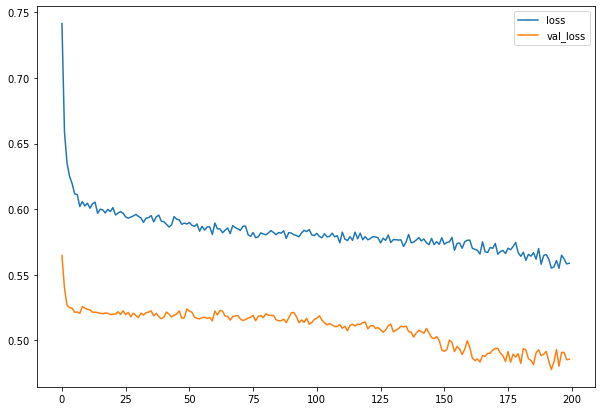

In [54]:
metrics_seq = pd.DataFrame(history_seq.history)
metrics_seq [['loss','val_loss']].plot(figsize =(10,7))

## ANN Model with Functional API

### Make The Model Architecture

In [55]:
data_in = Input(shape = (22,))
data_in = BatchNormalization()(data_in)
data_in = Dropout(0.2)(data_in)

hidden_1 = Dense(22, kernel_initializer = keras.initializers.HeNormal(), activation = 'relu')(data_in)
hidden_1 = BatchNormalization()(hidden_1)
hidden_1 = Dropout(0.2)(hidden_1)

hidden_2 = Dense(8, kernel_initializer = keras.initializers.HeNormal(), activation = 'relu')(hidden_1)
hidden_2 = BatchNormalization()(hidden_2)
hidden_2 = Dropout(0.2)(hidden_2)

output_lay = Dense(1, kernel_initializer = keras.initializers.GlorotNormal(), activation = 'sigmoid')(hidden_2)

model_func = Model(inputs = data_in, outputs = output_lay)

In [56]:
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 22)]              0         
                                                                 
 dense_3 (Dense)             (None, 22)                506       
                                                                 
 batch_normalization_4 (Batc  (None, 22)               88        
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 22)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 184       
                                                                 
 batch_normalization_5 (Batc  (None, 8)                32        
 hNormalization)                                             

### Compile

In [57]:
model_func.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

### Train The Model

In [58]:
history_func = model_func.fit(train_data, epochs = 200, validation_data=(X_val_encode,y_val_encode))

Epoch 1/200
133/133 [==============================] - 1s 4ms/step - loss: 0.6734 - accuracy: 0.6127 - val_loss: 0.5465 - val_accuracy: 0.7493
Epoch 2/200
133/133 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.6653 - val_loss: 0.5191 - val_accuracy: 0.7476
Epoch 3/200
133/133 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.6870 - val_loss: 0.5180 - val_accuracy: 0.7404
Epoch 4/200
133/133 [==============================] - 0s 2ms/step - loss: 0.6083 - accuracy: 0.6864 - val_loss: 0.5157 - val_accuracy: 0.7431
Epoch 5/200
133/133 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.6907 - val_loss: 0.5160 - val_accuracy: 0.7440
Epoch 6/200
133/133 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.6948 - val_loss: 0.5140 - val_accuracy: 0.7493
Epoch 7/200
133/133 [==============================] - 0s 2ms/step - loss: 0.5957 - accuracy: 0.6929 - val_loss: 0.5140 - val_accuracy: 0.7440

### Visualize loss and val_loss Charts

<AxesSubplot:>

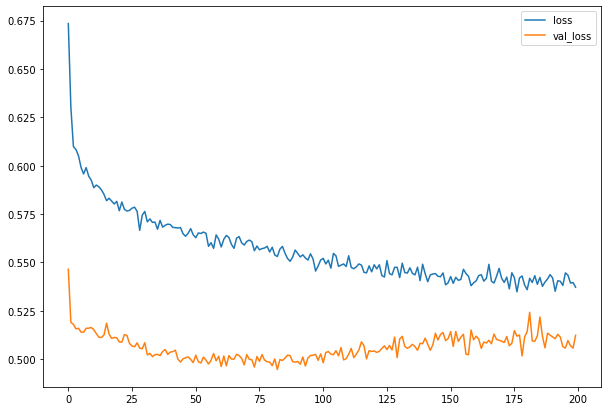

In [59]:
metrics_func = pd.DataFrame(history_func.history)
metrics_func [['loss','val_loss']].plot(figsize =(10,7))

## Model Evaluation - Before Optimization

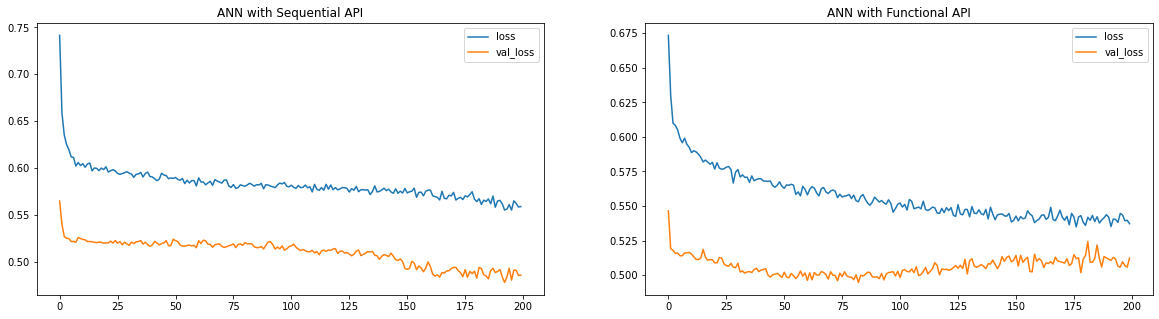

In [60]:
figure, ax = plt.subplots (1,2, figsize =(20,5))
metrics_seq [['loss','val_loss']].plot(ax = ax[0])
ax[0].title.set_text('ANN with Sequential API')

metrics_func [['loss','val_loss']].plot(ax = ax[1])
ax[1].title.set_text('ANN with Functional API')

From ANN Model that have been initialize using Sequential and Functional API. We can see from the loss and val_loss graph. The model from both them are in a good shape. But i want to make it better, so in the next step, I am going to an Optimization to both of models.

## Model Improvement - ANN with Sequential API

**In this model improvement I am trying to modified the model above with only use 1 Hidden Layer with 8 neurons, I use Dropout with 0.1 rate, for the optimizer I change it to Nadam, also the activation for hidden layer I change it to elu and the rest is still the same.**

In [290]:
model_seq_opt = Sequential()

model_seq_opt.add(Input(shape = (22,))) #Input Layer
model_seq_opt.add(BatchNormalization())
model_seq_opt.add(Dropout(0.1))

model_seq_opt.add(Dense(8, kernel_initializer = keras.initializers.HeNormal(), activation = 'elu')) #1st Hidden Layer
model_seq_opt.add(BatchNormalization())
model_seq_opt.add(Dropout(0.1))

# model_seq_opt.add(Dense(4, kernel_initializer = keras.initializers.HeNormal(), activation = 'elu')) ##2nd Hidden Layer
# model_seq_opt.add(BatchNormalization())
# model_seq_opt.add(Dropout(0.1))

model_seq_opt.add(Dense(1, kernel_initializer = keras.initializers.GlorotNormal(), activation = 'sigmoid')) #Output Layer

In [291]:
model_seq_opt.compile(loss = 'binary_crossentropy',
                optimizer = 'nadam', # now I'm using nadam optimizer to improve the model
                metrics = ['accuracy'])

In [292]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [293]:
history_seq_opt = model_seq_opt.fit(train_data, epochs = 200, validation_data=(X_val_encode,y_val_encode))

Epoch 1/200
133/133 [==============================] - 2s 5ms/step - loss: 0.7074 - accuracy: 0.5518 - val_loss: 0.5664 - val_accuracy: 0.7218
Epoch 2/200
133/133 [==============================] - 0s 3ms/step - loss: 0.6160 - accuracy: 0.6662 - val_loss: 0.5313 - val_accuracy: 0.7396
Epoch 3/200
133/133 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.6878 - val_loss: 0.5207 - val_accuracy: 0.7342
Epoch 4/200
133/133 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.6855 - val_loss: 0.5200 - val_accuracy: 0.7342
Epoch 5/200
133/133 [==============================] - 0s 3ms/step - loss: 0.5972 - accuracy: 0.6883 - val_loss: 0.5172 - val_accuracy: 0.7342
Epoch 6/200
133/133 [==============================] - 0s 3ms/step - loss: 0.5871 - accuracy: 0.6929 - val_loss: 0.5164 - val_accuracy: 0.7298
Epoch 7/200
133/133 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.6942 - val_loss: 0.5153 - val_accuracy: 0.7333

<AxesSubplot:>

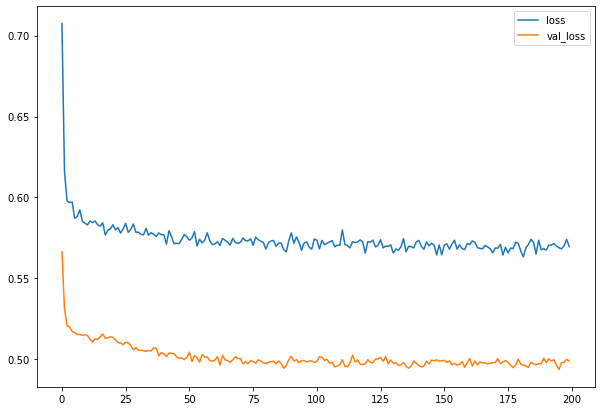

In [294]:
metrics_seq_opt = pd.DataFrame(history_seq_opt.history)
metrics_seq_opt [['loss','val_loss']].plot(figsize =(10,7))

## Model Evaluation for ANN with Sequential API (Before and After Optimization)

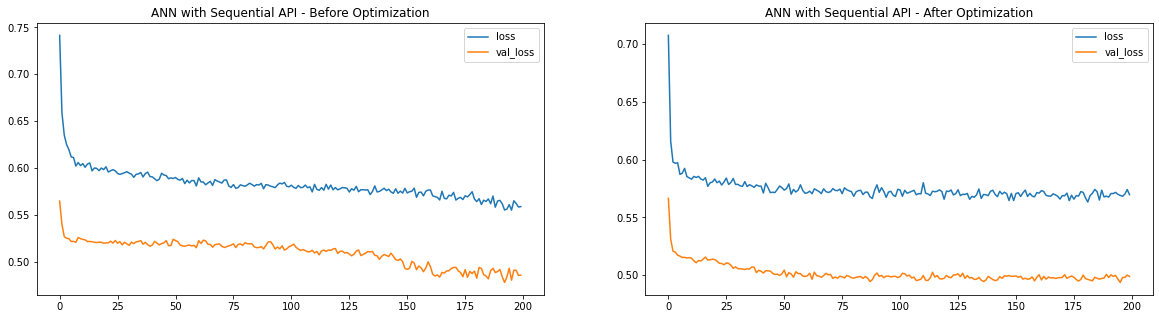

In [295]:
figure, ax = plt.subplots (1,2, figsize =(20,5))
metrics_seq [['loss','val_loss']].plot(ax = ax[0])
ax[0].title.set_text('ANN with Sequential API - Before Optimization')

metrics_seq_opt [['loss','val_loss']].plot(ax = ax[1])
ax[1].title.set_text('ANN with Sequential API - After Optimization')

In [296]:
#Predict using ANN with Sequential (Before Optimization)
pred_seq = model_seq.predict(X_val_encode)
pred_seq[pred_seq <= 0.5] = 0
pred_seq[pred_seq > 0.5] = 1
pred_seq = pred_seq.squeeze() 

#Predict using ANN with Sequential (After Optimization)
pred_seq_opt = model_seq_opt.predict(X_val_encode)
pred_seq_opt[pred_seq_opt <= 0.5] = 0
pred_seq_opt[pred_seq_opt > 0.5] = 1
pred_seq_opt = pred_seq_opt.squeeze() 

In [274]:
print(classification_report(y_val_encode, pred_seq))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       826
           1       0.55      0.61      0.58       299

    accuracy                           0.76      1125
   macro avg       0.70      0.72      0.71      1125
weighted avg       0.77      0.76      0.77      1125



In [297]:
print(classification_report(y_val_encode, pred_seq_opt))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       826
           1       0.50      0.75      0.60       299

    accuracy                           0.74      1125
   macro avg       0.70      0.74      0.70      1125
weighted avg       0.79      0.74      0.75      1125



ANN with Sequential API Summary:

1. From the graph we can see that the ANN before optimization gave better loss than the ANN after optimization. Also we can see the loss and val_loss graph before optimization tends to decrese, different from the ANN after optimization, both loss graph kinda stuck.
2. From the classification report, the ANN before optimization also have a slightly better score. Which I focuse on seeing the recall score on value '0' (which gave the No Value better).
3. And the last, from both statements I can conclude that optimization the ANN Model not always by reducing the hidden layer or other optimization stuff. Which mean in this ANN case we have to do more trail and error testing to get the best model that we want.

## Model Improvement - ANN with Functional API

**It's the same with the ANN Model Improvement, where I only use 1 hidden layer with 8 neurons, dropout rate at 0.1, activation for hidden layer I use elu, for the optimizer I use nadam and the rest is still the same**

In [232]:
data_in = Input(shape = (22,))
data_in = BatchNormalization()(data_in)
data_in = Dropout(0.1)(data_in)

# hidden_1 = Dense(22, kernel_initializer = keras.initializers.HeNormal(), activation = 'elu')(data_in)
# hidden_1 = BatchNormalization()(hidden_1)
# hidden_1 = Dropout(0.1)(hidden_1)

hidden_2 = Dense(8, kernel_initializer = keras.initializers.HeNormal(), activation = 'elu')(data_in)
hidden_2 = BatchNormalization()(hidden_2)
hidden_2 = Dropout(0.1)(hidden_2)

output_lay = Dense(1, kernel_initializer = keras.initializers.GlorotNormal(), activation = 'sigmoid')(hidden_2)

model_func_opt = Model(inputs = data_in, outputs = output_lay)

In [ ]:
data_in = Input(shape = (22,))
data_in = BatchNormalization()(data_in)
data_in = Dropout(0.2)(data_in)

hidden_1 = Dense(22, kernel_initializer = keras.initializers.HeNormal(), activation = 'relu')(data_in)
hidden_1 = BatchNormalization()(hidden_1)
hidden_1 = Dropout(0.2)(hidden_1)

hidden_2 = Dense(8, kernel_initializer = keras.initializers.HeNormal(), activation = 'relu')(hidden_1)
hidden_2 = BatchNormalization()(hidden_2)
hidden_2 = Dropout(0.2)(hidden_2)

output_lay = Dense(1, kernel_initializer = keras.initializers.GlorotNormal(), activation = 'sigmoid')(hidden_2)

model_func = Model(inputs = data_in, outputs = output_lay)

In [233]:
model_func_opt.compile(loss = 'binary_crossentropy',
                optimizer = 'nadam',
                metrics = ['accuracy'])

In [234]:
history_func_opt = model_func_opt.fit(train_data, epochs = 200, validation_data=(X_val_encode,y_val_encode))

Epoch 1/200
133/133 [==============================] - 1s 4ms/step - loss: 0.8553 - accuracy: 0.5064 - val_loss: 0.5748 - val_accuracy: 0.7164
Epoch 2/200
133/133 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.6427 - val_loss: 0.5278 - val_accuracy: 0.7396
Epoch 3/200
133/133 [==============================] - 0s 2ms/step - loss: 0.6160 - accuracy: 0.6778 - val_loss: 0.5133 - val_accuracy: 0.7298
Epoch 4/200
133/133 [==============================] - 0s 2ms/step - loss: 0.6019 - accuracy: 0.6885 - val_loss: 0.5115 - val_accuracy: 0.7396
Epoch 5/200
133/133 [==============================] - 0s 2ms/step - loss: 0.5977 - accuracy: 0.6885 - val_loss: 0.5086 - val_accuracy: 0.7422
Epoch 6/200
133/133 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.6853 - val_loss: 0.5059 - val_accuracy: 0.7396
Epoch 7/200
133/133 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.6879 - val_loss: 0.5028 - val_accuracy: 0.7449

<AxesSubplot:>

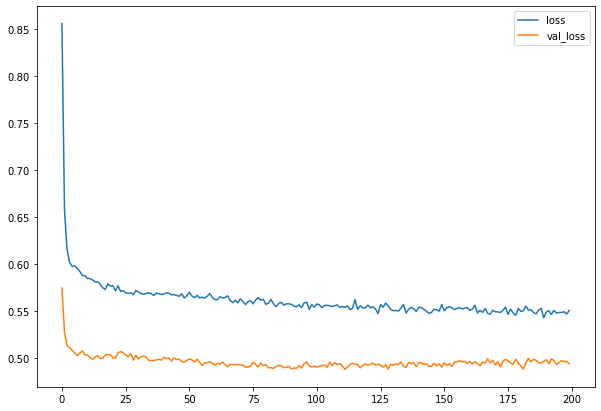

In [235]:
metrics_func_opt = pd.DataFrame(history_func_opt.history)
metrics_func_opt [['loss','val_loss']].plot(figsize =(10,7))

## Model Evaluation for ANN with Functional API (Before and After Optimization)

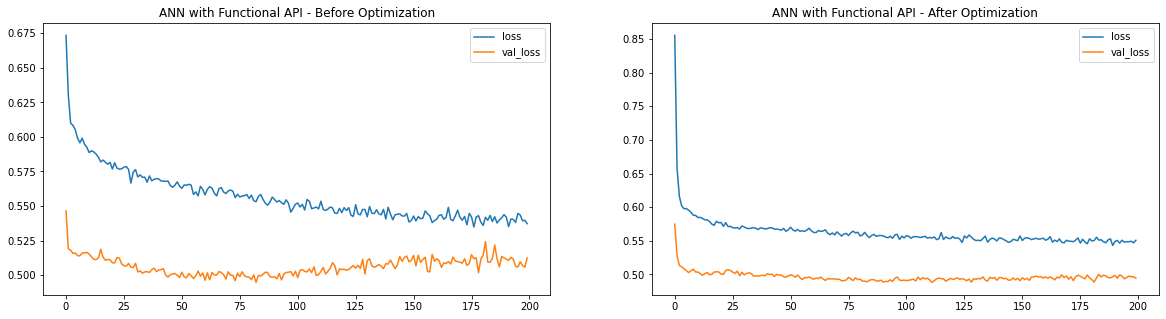

In [236]:
figure, ax = plt.subplots (1,2, figsize =(20,5))
metrics_func [['loss','val_loss']].plot(ax = ax[0])
ax[0].title.set_text('ANN with Functional API - Before Optimization')

metrics_func_opt [['loss','val_loss']].plot(ax = ax[1])
ax[1].title.set_text('ANN with Functional API - After Optimization')

In [298]:
#Predict using ANN with Functional (Before Optimization)
pred_func = model_func.predict(X_val_encode)
pred_func[pred_func <= 0.5] = 0
pred_func[pred_func > 0.5] = 1
pred_func = pred_func.squeeze() 

#Predict using ANN with Functional (After Optimization)
pred_func_opt = model_func_opt.predict(X_val_encode)
pred_func_opt[pred_func_opt <= 0.5] = 0
pred_func_opt[pred_func_opt > 0.5] = 1
pred_func_opt = pred_func_opt.squeeze() 

In [299]:
print(classification_report(y_val_encode, pred_func))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       826
           1       0.49      0.72      0.58       299

    accuracy                           0.73      1125
   macro avg       0.68      0.73      0.69      1125
weighted avg       0.78      0.73      0.74      1125



In [300]:
print(classification_report(y_val_encode, pred_func_opt))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       826
           1       0.48      0.75      0.59       299

    accuracy                           0.72      1125
   macro avg       0.68      0.73      0.69      1125
weighted avg       0.78      0.72      0.73      1125



ANN with Functional API Summary:

1. Slightly different with the ANN Sequential. In this ANN with Functional case, I get better loss and val_loss graph after optimization. We can see the graph before optimization, the more epochs, the more val_loss increasing.
2. Next for the classification report. There's no big different between before and after optimization. And I can say that the score from both of them are still the same.
3. My conclusion from both of statements above. In this case, decreasing the hidden layer and other stuff optimization make the loss and val_loss graph better. After optimization both of them tend to decrease

## Model Inference

**In this model Inference, Based on the Test Above. I am going to predict to test data by using model ANN with Sequential Before Optimization and ANN with Function After Optimization**

### With ANN Sequential (Before Optimization)

In [301]:
test_seq  = model_seq.predict(X_test_encode)
test_seq[test_seq <= 0.5] = 0
test_seq[test_seq > 0.5] = 1
test_seq = test_seq.squeeze() 
test_seq

array([1., 0., 1., ..., 0., 0., 1.], dtype=float32)

In [302]:
print(classification_report(y_test_encode, test_seq))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1033
           1       0.58      0.67      0.62       374

    accuracy                           0.78      1407
   macro avg       0.73      0.75      0.74      1407
weighted avg       0.80      0.78      0.79      1407



### With ANN Functional (After Optimization)

In [303]:
test_func_opt  = model_func_opt.predict(X_test_encode)
test_func_opt[test_func_opt <= 0.5] = 0
test_func_opt[test_func_opt > 0.5] = 1
test_func_opt = test_func_opt.squeeze() 
test_func_opt

array([1., 0., 1., ..., 0., 0., 1.], dtype=float32)

In [304]:
print(classification_report(y_test_encode, test_func_opt))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.75      0.71      1407
weighted avg       0.80      0.74      0.76      1407



From this model inference testing. We can see that predicting test data with ANN Sequential Model gave better recall score for '0' (Predict No Churn) than ANN Functional Model.

## Analysis

### EDA Analysis

The conclusions that I can get from doing EDA things for this Telco Customer Churn dataset are:
1. Based on correlation graph. The most influential features is Contract. From here we can see the the possibility of the customer churn or not is by seeing from what contract that they took, is it month-month or even two year contract.
2. From the services graph, such as Online Security, Online Backup or other services. a customer who didn't took any service also have biggest possibility to churn.
3. After ploting tenure with Monthly Charges. This can answer the second statement. The customer churn happen to a new customer with low tenure (they just subscribed not long ago around under 5 months) and they took monthly subscription package with charge over than 70 Dollars. Maybe the reason is because the monthly charge that they paid was not worth with the services that they got.

So I also assume that customer who didn't use services is the first step for them to churn and move to different providers that can fulfill their expectation.


### Model Analysis

The conclusions that I can get from making an ANN Model for this dataset are:
1. a lot of variables that determine whether a model is good or not. And based on my evaluation, why the ANN with Sequential and ANN with Functional API gave different results it's because the weight Initiation from each model is random, so the possibility of the model gave different result getting bigger.
2. By declaring some technique such as Weight Initialization, Activation Function, Batch Normalizaiton and Optimizer in base model, It will give the model faster and better performance.
2. Based on the model i worked on, For predicting the 0 value (Predict No Churn Customer), the ANN Sequential gave better results.